<a href="https://colab.research.google.com/github/taiwango188/khpy_python_basics/blob/main/%E5%8F%B0%E6%9C%9F%E6%8C%87_line_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.安装模塊**


In [ ]:
!pip install shioaji # 永豐金 套件
!pip install finlab # finlab 套件

# FinMind數據不用安裝套件
# 另外還有 tej api
!pip install mplfinance # kbars繪圖套件

line_bot = '你的line notify token'
line_url = 'https://notify-api.line.me/api/notify'

sj_api_key= "永豐金api_key"
sj_secret_key="永豐金secret_key"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **2.導入模塊/api_key/secret_key**
[shioji 登入說明](https://sinotrade.github.io/zh_TW/tutor/login/)

In [ ]:
from shioaji import Exchange, TickSTKv1, BidAskSTKv1
from threading import Event #threading模組，匯入Event物件
import os,json,threading ,requests,warnings ,datetime,time,sys,os
import mplfinance as mpf
# import connect_config as cc
sys.path.append('/content/drive/MyDrive/Colab Notebooks/config/')
import shioaji as sj
import pandas as pd
warnings.filterwarnings("ignore")
# import sj_mtx as sf
pd.set_option('display.max_rows', 200)

warnings.filterwarnings("ignore")
# import sj_mtx as sf
pd.set_option('display.max_rows', 200)

## **2.1 登入永豐金API**

In [ ]:

# import connect_config as cc
api = sj.Shioaji(simulation=False)
api.login(
    api_key= sj_api_key,
    secret_key= secret_key
    )
print(api.usage())
# api.logout()
print(round(api.usage().remaining_bytes/1024/1024))

Response Code: 0 | Event Code: 0 | Info: host '203.66.91.161:80', IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total connection attempt 1 of 1) | Event: Session up
connections=5 bytes=46575463 limit_bytes=2147483648 remaining_bytes=2100908185
2004


In [ ]:
contract=api.Contracts.Futures["TXFR1"]
contract=api.Contracts.Stocks["2330"]

# **4.API接口取回K線數據 kbars**

[kbars api說明](https://sinotrade.github.io/zh_TW/tutor/market_data/historical/)

In [ ]:
contract=api.Contracts.Futures["MXFL3"]
kbars = api.kbars(
    contract=api.Contracts.Futures["TXFR1"],
    start="2024-01-15",
    end="2024-02-22",
)
kbars
df = pd.DataFrame({**kbars})
df.ts = pd.to_datetime(df.ts)
df.set_index('ts', inplace=True)
df.index = pd.to_datetime(df.index)
df

,Open,High,Low,Close,Volume,Amount
ts,,,,,,
2024-01-15 08:46:00,17580.0,17645.0,17574.0,17644.0,4999,88018525.0
2024-01-15 08:47:00,17643.0,17652.0,17629.0,17635.0,2009,35438412.0
2024-01-15 08:48:00,17633.0,17636.0,17604.0,17610.0,1477,26019323.0
2024-01-15 08:49:00,17610.0,17610.0,17585.0,17587.0,838,14749083.0
2024-01-15 08:50:00,17588.0,17610.0,17587.0,17602.0,697,12267192.0
...,...,...,...,...,...,...
2024-02-22 22:04:00,18949.0,18949.0,18947.0,18947.0,22,416853.0
2024-02-22 22:05:00,18947.0,18948.0,18946.0,18948.0,47,890513.0
2024-02-22 22:06:00,18948.0,18949.0,18947.0,18947.0,40,757914.0


## **4.1 分鐘K轉日K**

In [ ]:
daily_data = df.resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum',
    'Amount': 'sum'
}).reset_index()
daily_data.tail()

,ts,Open,High,Low,Close,Volume,Amount
34,2024-02-18,NaN,NaN,NaN,NaN,0,0.000000e+00
35,2024-02-19,18680.0,18692.0,18619.0,18667.0,62877,1.173318e+09
36,2024-02-20,18666.0,18817.0,18596.0,18764.0,94285,1.764556e+09
37,2024-02-21,18763.0,18768.0,18659.0,18683.0,74145,1.386467e+09
38,2024-02-22,18682.0,18968.0,18673.0,18948.0,117150,2.206882e+09


In [ ]:
daily_data.set_index('ts', inplace=True)
# Convert 'Date' column to DatetimeIndex
daily_data.index = pd.to_datetime(daily_data.index)
daily_data.tail()

,Open,High,Low,Close,Volume,Amount
ts,,,,,,
2024-02-18,NaN,NaN,NaN,NaN,0,0.000000e+00
2024-02-19,18680.0,18692.0,18619.0,18667.0,62877,1.173318e+09
2024-02-20,18666.0,18817.0,18596.0,18764.0,94285,1.764556e+09
2024-02-21,18763.0,18768.0,18659.0,18683.0,74145,1.386467e+09
2024-02-22,18682.0,18968.0,18673.0,18948.0,117150,2.206882e+09


# **4.2 線圖**

### **4.2.1 分鐘線**

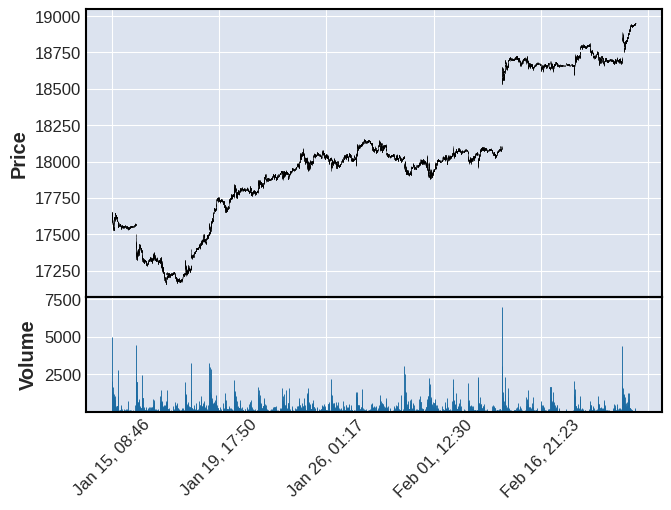

In [ ]:
mpf.plot(df, type='candle', volume=True, show_nontrading=False)

### **4.2.1 日線**

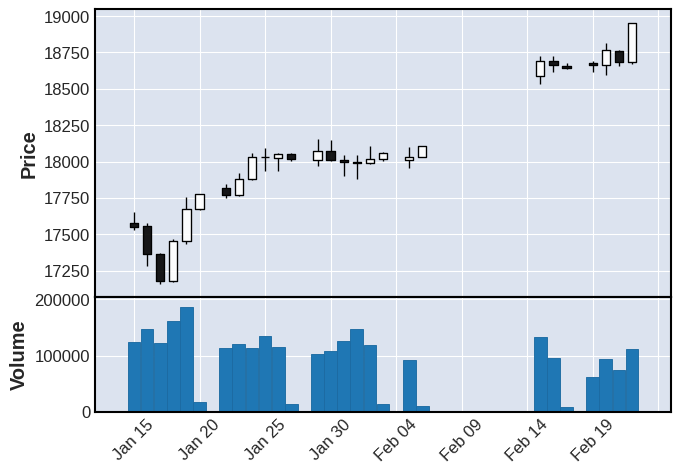

In [ ]:
mpf.plot(daily_data, type='candle', volume=True, show_nontrading=False)

In [ ]:
colors = mpf.make_marketcolors(
    up='r',  # Green for up days
    down='g',  # Red for down days
    edge='black',
    wick='black',
    volume='in',)
# Create a custom style based on the color map
style = mpf.make_mpf_style(marketcolors=colors)
mpf.plot(daily_data, type='candle', style=style, volume=True, show_nontrading=False, savefig='fig.png')

# Line Bot

In [ ]:
import requests

url = 'https://notify-api.line.me/api/notify'
headers = {
    'Authorization': 'Bearer ' + line_bot    # 設定權杖
}
data = {
    'message':'測試一下！'     # 設定要發送的訊息
}
data = requests.post(url, headers=headers, data=data)   # 使用 POST 方法

## 發送最新價格

In [ ]:
import requests

url = 'https://notify-api.line.me/api/notify'
headers = {
    'Authorization': 'Bearer ' + line_bot    # 設定權杖
}
data = {
    'message':f"台期指 {df.index[-1]}  {df.Close[-1]}"     # 設定要發送的訊息
}
data = requests.post(url, headers=headers, data=data)   # 使用 POST 方法

In [ ]:
# 要發送的訊息
message = '這是用 Python 發送的訊息與圖片'

# HTTP 標頭參數與資料
headers = { "Authorization": "Bearer " + line_bot }
data = { 'message': message }

# 要傳送的圖片檔案
image = open('fig.png', 'rb')
files = { 'imageFile': image }

# 以 requests 發送 POST 請求
requests.post("https://notify-api.line.me/api/notify",
    headers = headers, data = data, files = files)

<Response [200]>

In [ ]:
api.logout()

True